
### 4.1 Discrete mixture of bivariate laplace Distribution

Read just the single page of my time series book, page 650. This is for a multivariate Laplace distribution. Notice, crucially, this sentence:

Let (Y ∣ G = g) ∼ Nd (𝝁, g𝚺) for 𝝁 ∈ ℝd and 𝚺 > 0, i.e., positive definite, and let G ∼ Gam (b, 1),


So, you see that it is trivial to simulate realizations from Y ∼ Lap(𝝁, 𝚺, b). We will be working only in the d=2 (bivariate) case, so it will be easy for you to make a 2 X 2 positive definite covariance matrix 𝚺.



Make a program to input all the relevant parameters for simulating the 2-component, bivariate discrete mixture of Laplace. Document it nicely. Choose reasonable values for parameters, such as might roughly correspond to financial data, e.g., b1=10, b2=5, and the Sigma2 matrix has much larger diagonal elements than Sigma1, this 2nd component of the mixture capturing the more extreme behavior of the returns. Simulate realizations, and produce one nice-looking 3D plot.



In [294]:
import numpy as np                                  # data manipulation
from numpy.linalg import eig                        # checking for positive definiteness 
import pandas as pd                                 # data manipulation
import matplotlib.pyplot as plt                     # plotting
from mpl_toolkits.mplot3d import Axes3D             # plotting
from scipy.stats import multivariate_normal         # multivariate normal distribution

### Formula for the mixutre laplace distribution
(Y ∣ G = g) ∼ Nd (𝝁, g𝚺) for 𝝁 ∈ ℝd and 𝚺 > 0, i.e., positive definite, and let G ∼ Gam (b, 1)


Where we simulate a mixture of normals and add a simulated gamma distribution to the covariance matrix. 


In [469]:
# creating a function to simulate the mixture of two laplace distributions
'''
Inputs:
    num_samples: The number of samples to simulate
    mu1: The mean of the first component
    mu2: The mean of the second component
    b1: The scale parameter of the first component
    b2: The scale parameter of the second component
    p: The probability of the first component
    sigma1: The covariance matrix of the first component (represent "good" state)
    sigma2: The covariance matrix of the second (represent "bad" state)
Outputs:
    samples: The simulated samples of a mixture of bivariate laplace distributions
'''

def simulate_mixture_laplace(mu1,mu2, b1, b2, Sigma1, Sigma2, p, num_samples=1000):
    # Sigma must be larger than 0, i.e. positive definite. Check this using eigenvalues
    eVal1 = eig(Sigma1)[0]      
    eVal2 = eig(Sigma2)[0]
    if np.all(eVal1 <= 0) or np.all(eVal2 <= 0):
       raise ValueError("All elements in Sigma must be larger than 0")
    else:
        # Decide the probability for each sample
        sampleProbability = np.random.choice([0,1], size=num_samples, p=[p, 1-p])

        # Initialize samples array
        samples = np.zeros((num_samples, 2))

        # Simulate samples for each component
        for i in range(num_samples):
            if sampleProbability[i] == 0:
                Sigma = Sigma1
                b = b1
                mu = mu1
            else:
                Sigma = Sigma2
                b = b2
                mu = mu2

            # Generate G samples from the Gamma distribution
            G = np.random.gamma(b,1,1)

            # Simulate Y samples from a multivariate normal distribution with sigma*Gamma
            Y = np.random.multivariate_normal(mu, Sigma * G)
            #Y = multivariate_normal.rvs(mu, Sigma * G[0])
            # Assign the sample to the array
            samples[i] = Y

        return samples


In [470]:
# Parameters that work but ugly plots 
np.random.seed(0)
# Set parameters
num_samples = 10000
mu1 = 50,100
mu2 = 0,0
b1, b2 = 10, 5
Sigma1 = np.array([[1, 0.4], [0.4, 1]])
Sigma2 = np.array([[100, 160], [160, 300]])
p = 0.8


# Simulate samples
samples = simulate_mixture_laplace(mu1, mu2, b1, b2, Sigma1, Sigma2, p, num_samples)


In [609]:
# trying new parameters for nicer plots. closer to finance
np.random.seed(0)
# Set parameters
num_samples = 10000
mu1 = 0,1
mu2 = -5,-1
b1, b2 = 10, 5
Sigma1 = np.array([[1, 0.4], [0.4, 1]])
Sigma2 = np.array([[4, 0.4], [0.4, 4]])
p = 0.8


# Simulate samples
samples = simulate_mixture_laplace(mu1, mu2, b1, b2, Sigma1, Sigma2, p, num_samples)

In [610]:
samples_df = pd.DataFrame(samples, columns=['x1', 'x2'])
samples_df.head(5)


,x1,x2
0,-1.291953,-0.304131
1,-0.511965,-1.392671
2,0.272983,-0.570526
3,-0.105566,3.078083
4,-0.299087,0.703683


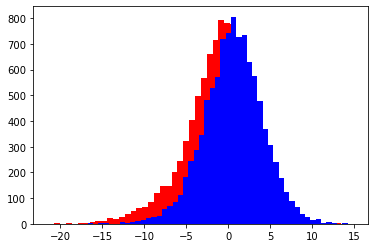

In [611]:
plt.hist(samples_df['x1'], bins=50, color='red');
plt.hist(samples_df['x2'], bins=50, color='blue');

In [607]:
min_x1 = samples_df['x1'].min()
max_x1 = samples_df['x1'].max()
min_x2 = samples_df['x2'].min()
max_x2 = samples_df['x2'].max()

print(min_x1, max_x1, min_x2, max_x2)

-26.420100841064684 18.5148815056411 -20.752256923728435 23.876911043942417


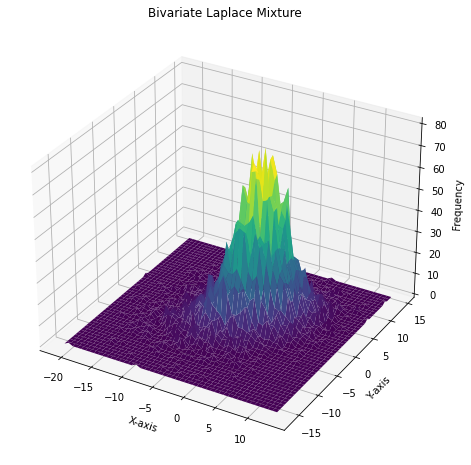

In [641]:
# Plot the samples

# Calculate the histogram
hist, edges = np.histogramdd(samples, bins=50)

# Get the centers of each bin
x_centers = (edges[0][1:] + edges[0][:-1]) / 2
y_centers = (edges[1][1:] + edges[1][:-1]) / 2

# Create a meshgrid for the X and Y coordinates
X, Y = np.meshgrid(x_centers, y_centers)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, hist.T, cmap='viridis')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Frequency')
ax.set_title('Bivariate Laplace Mixture')

# Show the plot
plt.show()


In [642]:
'''
not using the multivariate but using a mixture of normal distributions instead with a given probability p. 
    
    Inputs: 
        mu1: 

'''

def simMixLaplace(mu1, mu2, b1, b2, sigma1, sigma2, p, n=1000):
    # Sigma must be larger than 0, i.e. positive definite. Check this using eigenvalues
    eVal1 = eig(sigma1)[0]      
    eVal2 = eig(sigma2)[0]
    if np.all(eVal1 <= 0) or np.all(eVal2 <= 0):
       raise ValueError("All elements in Sigma must be larger than 0")
    else:
        # Decide the probability for each sample
        sampleProbability = np.random.choice([0,1], size=n, p=[p, 1-p])

        # Initialize samples array
        samples = np.zeros((n, 2))
        #y = np.zeros((n,2))
        y1 = np.zeros((n,2))
        y2 = np.zeros((n,2))

        # Simulate samples for each component
        for i in range(n):
            if sampleProbability[i] == 0:
                sigma = sigma1
                mu = mu1
                b = b1
                g = np.random.gamma(b1,1,1)
                y1[i] = np.random.normal(mu, np.diag(sigma) * g)
            else:
                sigma = sigma2
                mu = mu2
                b=b2
                g = np.random.gamma(b1,1,1)
                y2[i] = np.random.normal(mu, np.diag(sigma) * g)

            # Simulate Y samples from a multivariate normal distribution with sigma*Gamma
            #Y = np.random.multivariate_normal(mu, sigma)
            # Assign the sample to the array
            samples[i] = y1[i]*(1-sampleProbability[i]) + y2[i]*(sampleProbability[i])
            res = {'Samples': samples, 'Y1': y1 , 'Y2':y2}
        return res
        #return y

In [643]:
np.random.seed(0)
mu1, mu2 = 5, -5
sigma1 = np.array([[1, 0.4], [0.4, 1]])
sigma2 = np.array([[4, 1], [1, 4]])
p = 0.8
b1, b2 = 10, 5


tmp = simMixLaplace(mu1, mu2, b1, b2, Sigma1, Sigma2, p, n=1000)

In [646]:
tmp

{'Samples': array([[ 5.18033766,  5.18033766],
        [15.29247799, 15.29247799],
        [ 6.36496083,  6.36496083],
        ...,
        [-3.69083566, -3.69083566],
        [ 2.90750747,  2.90750747],
        [-0.74922612, -0.74922612]]),
 'Y1': array([[ 5.18033766,  5.18033766],
        [15.29247799, 15.29247799],
        [ 6.36496083,  6.36496083],
        ...,
        [ 0.        ,  0.        ],
        [ 2.90750747,  2.90750747],
        [-0.74922612, -0.74922612]]),
 'Y2': array([[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        ...,
        [-3.69083566, -3.69083566],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]])}

KeyError: 'x1'

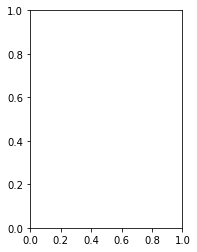

In [645]:
# comparing the distributions
plt.show()
plt.subplot(1, 2, 1)
plt.hist(tmp_df['x1'], bins=50, color='red')
plt.title('Histogram of x1')

plt.subplot(1, 2, 2)
plt.hist(tmp_df['x2'], bins=50, color='blue')
plt.title('Histogram of x2')

plt.tight_layout()
plt.show()


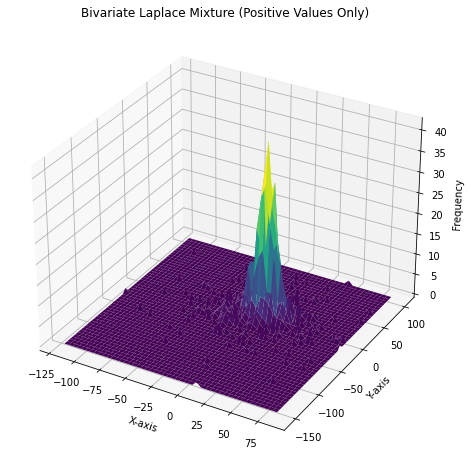

In [623]:

# Calculate the histogram size and sample
hist, x_edges, y_edges = np.histogram2d(
    tmp_df['x1'],
    tmp_df['x2'],
    bins=50
)

# Get the centers of each bin
x_centers = (x_edges[1:] + x_edges[:-1]) / 2
y_centers = (y_edges[1:] + y_edges[:-1]) / 2

# Create a meshgrid for the X and Y coordinates
X, Y = np.meshgrid(x_centers, y_centers)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, hist.T, cmap='viridis')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Frequency')
ax.set_title('Bivariate Laplace Mixture (Positive Values Only)')

# Show the plot
plt.show()